<a href="https://colab.research.google.com/github/Ana1890/Deteccion-de-objetos-en-imagenes/blob/master/Mentoria_tercera_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación </h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
<h2>Mentoría: Detección de objetos en imágenes</h2>
</center>


En la siguiente notebook, incorporaremos parte de lo realizado en las entregas de los grupos de estudiantes: 

* [Grupo 1](https://github.com/Ana1890/Deteccion-de-objetos-en-imagenes) : Ana Rusconi, Ignacio Grosso y  Mariano Lucero

* [Grupo 2](https://github.com/leorodriguez/mentoria-diplodatos-grupo2):  Diego Gonzalez, Florencia Caballero, Joel Vivas y Leonardo Rodriguez


<a name="aprendizaje_supervisado"></a>
### **Intro Aprendizaje Supervisado**

En esta entrega seguiremos utilizando la carpeta [muestra](https://drive.google.com/drive/folders/1_2oDQPL7n8QI_YEUOecAHyabwA9Gmud0?usp=sharing).


Repasaremos las técnicas aprendidas en la materia *'Introducción al Aprendizaje Automático'* tales como *regresión lineal y polinomial* con y sin regularización y para clasificación, implementaremos sólo los algoritmos de *Perceptrón, SGD y Árboles de Decisión*.





**Estructura del informe:** 

Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:


  1- Recordar que en nuestro caso podemos realizar clasificación podemos hacer las dos clases de clasificación, binaria ( guantes: si - no) y multiclase ('mano', 'verde' y 'amarillo'). Por lo cual se pueden descartar aquellas columnas categóricas que no sumen al problema y definir como 'target' nuesta columna de interés.

Visualizar la cantidad de datos para cada clase y calcular el porcentaje de las mismas.
 
Separar la base en los conjuntos *P* y *G*. 
Y sobre cada conjunto, separar en *train* (con el 80 % de los datos y *test* con el 20%)


 
  2- De las variables/características/features numéricas que hayan encontrado en notebooks anteriores, elegir como mucho las 5 mas representativas para:

  *   Regresión:

     a) Hacer una gráfica que muestre su relación con la variable objetivo. Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado. Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.  
    
     b) Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones. 
    
     c) Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste.
     d) Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.


  *   Clasificación:
   De a pares de características, implementar los algoritmos de Perceptrón, SGD y Árboles de Decisión en el conjunto Train para clasificación binaria: guantes si - guantes no (algoritmos del paquete sklearn). Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco.

   Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros. 

 

Usando como entorno a Colab:

In [1]:
#vinculamos el Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# librerías necesarias 
import os
from os import path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#seguimos agregando librerías necesarias:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

from sklearn.linear_model import Lasso, Ridge



#### <a name="hay_tabla!"></a>
#### **Análisis exploratorio**

In [3]:
#nos posicionamos en la carpeta muestra:
os.chdir('/content/drive/My Drive/Mentoria/muestra')
! ls -d Dataset-*/

Dataset-M/  Dataset-N/	Dataset-T/


In [4]:
#leemos el archivo de la tabla:
csv_wlabels_df = pd.read_csv('csv_wlabels_muestra_df_original.csv', index_col=0)
print(csv_wlabels_df.shape)
csv_wlabels_df.head()

(1668, 2061)


,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


Esta tabla fue generada en una notebook anterior [2-Generación_de_fotos_recortadas_y_tabla-Análisis_y_Curación.ipynb](https://colab.research.google.com/drive/1fgB4F4DlBqkCvOatqo3whm4ZTPsiP0L7)

##Separación de los datos

Realizamos una copia de la tabla original para evitar modificarla:

In [5]:
tabla_0=csv_wlabels_df.copy()
tabla_0.head()

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,si,Amarillo,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,si,Amarillo,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,si,Amarillo,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,si,Amarillo,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,si,Amarillo,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


Visualizamos la cantidad de datos en cada clase:

In [6]:
tabla_0.groupby(by=['guantes', 'color']).size()

guantes  color   
no       mano        662
si       Amarillo    514
         Verde       492
dtype: int64

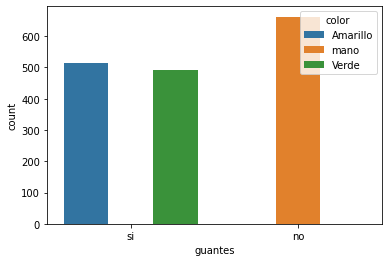

In [7]:
sns.countplot(data=tabla_0, x='guantes', hue='color')

Proporción de datos en cada clase:

In [8]:
guantes_mano=tabla_0[(tabla_0.color=='mano')]
guantes_verde=tabla_0[tabla_0.color=='Verde']
guantes_amarillo=tabla_0[tabla_0.color=='Amarillo']

In [9]:
proporcion_gsi=len(tabla_0[tabla_0.guantes=='si'])/len(tabla_0)*100
proporcion_gno=len(tabla_0[tabla_0.guantes=='no'])/len(tabla_0)*100

In [10]:
proporcion_gam=len(guantes_amarillo)/len(tabla_0)*100
proporcion_gver=len(guantes_verde)/len(tabla_0)*100
proporcion_gman=len(guantes_mano)/len(tabla_0)*100

In [11]:
proporcion_cam=len(guantes_amarillo)/len(tabla_0[tabla_0.guantes=='si'])*100
proporcion_cver=len(guantes_verde)/len(tabla_0[tabla_0.guantes=='si'])*100

In [12]:
print ( "Proporciones de nuestros datos en las clases: \n ")
print ('Proporciones de manos sin guantes' ,"  %", proporcion_gno,"\n ",
       'Proporciones de manos con guantes' ,"   %", proporcion_gsi,"\n ",
       'Proporciones de manos con guantes verdes' ,"   %", proporcion_gver,"\n ",
       'Proporciones de manos con guantes amarillos' ,"   %", proporcion_gam,"\n ",
       'Proporciones de manos con guantes color mano' ,"   %", proporcion_gman,"\n ",
       'Proporciones de manos con guantes verdes con respecto a amarillo' ,"   %", proporcion_cver,"\n ",
       'Proporciones de manos con guantes amarillos con respecto a verdes' ,"   %", proporcion_cam,"\n ",
          )

Proporciones de nuestros datos en las clases: 
 
Proporciones de manos sin guantes   % 39.68824940047961 
  Proporciones de manos con guantes    % 60.31175059952039 
  Proporciones de manos con guantes verdes    % 29.496402877697843 
  Proporciones de manos con guantes amarillos    % 30.815347721822544 
  Proporciones de manos con guantes color mano    % 39.68824940047961 
  Proporciones de manos con guantes verdes con respecto a amarillo    % 48.9065606361829 
  Proporciones de manos con guantes amarillos con respecto a verdes    % 51.0934393638171 
 


In [13]:
tabla_0_pequeño=tabla_0[tabla_0.Size=='P']
tabla_0_grande=tabla_0[tabla_0.Size=='G']

## Regresión Lineal

*a) Hacer una gráfica que muestre su relación con la variable objetivo. Instanciar una regresión lineal de scikit-learn, y entrenarla usando sólo el atributo seleccionado. Calcular el error cuadrático medio para los conjuntos de entrenamiento y evaluación y grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación. Interpretar el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.*

**Elección de atributos:** Recordando la notebook anterior, pudimos observar cuáles features se correlacionaban más con los valores de las coordenadas mínimas de nuestros objetos. Visualizamos esta relación para ver cuál feature o atributo es mejor para realizar una instancia de regresión lineal.

In [479]:
features_pequeño_xmin=['1936', '523', '990', '2013', '858']
features_columns=[tabla_0.columns[13:]]

Realizamos una elección de nuestros features para ver cuál elegir para el entrenamiento:

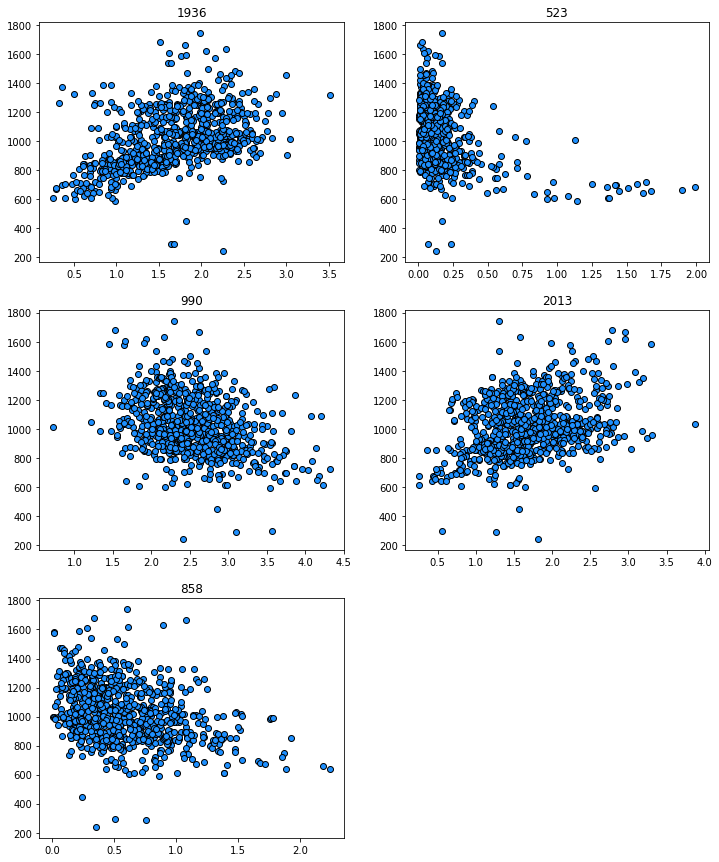

In [480]:
plt.figure(figsize=(12,15))
k=0

for i in features_pequeño_xmin:
 k=k+1
 plt.subplot(3,2,k) 
 plt.scatter(tabla_0_pequeño[i],tabla_0_pequeño['xmin'], facecolor="dodgerblue", edgecolor="k", label="datos") 
 plt.title(i)

La característica 1936 parece tener una mayor relación lineal con nuestra variable objetivo 'xmin'.

* Primero normalizaremos nuestros datos, puesto que ambas variables tienen rangos muy diferentes.

In [481]:
#Escalamos una dimensión
array_pequeño_xmin=np.array(tabla_0_pequeño['xmin'])
scaler_pequeño_xmin = preprocessing.StandardScaler().fit_transform(array_pequeño_xmin.reshape(-1,1))

#Escalamos la característica
df_pequeño_xmin_array=np.array(tabla_0_pequeño[features_pequeño_xmin])
scaler_pequeño_df = preprocessing.StandardScaler().fit_transform(df_pequeño_xmin_array)

#Pasamos los datos a un dataframe
df_pequeño_xmin_scaled=pd.DataFrame(data=scaler_pequeño_df, index=tabla_0_pequeño.index, columns=features_pequeño_xmin)
df_pequeño_xmin_scaled['xmin']=scaler_pequeño_xmin
df_pequeño_xmin_scaled.head(3)

,1936,523,990,2013,858,xmin
81,-0.295070,-0.188989,-0.500732,-0.472269,2.004951,-0.680945
82,-0.408917,-0.083926,0.663934,1.284970,0.369025,0.078225
83,-0.154939,-0.147934,1.302684,-0.981514,-0.952944,-0.766414


In [487]:
#Separación de los datos
X, y = np.array(df_pequeño_xmin_scaled['1936']), np.array(df_pequeño_xmin_scaled['xmin'])
X_train, X_test, y_train, y_test=train_test_split( X.reshape(-1,1), y.reshape(-1,1), train_size=0.80, random_state=0)
X_train.shape, y_train.shape

((636, 1), (636, 1))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [488]:
#Modelo
degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

#Predicción
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluación
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.83
Error en prueba: 0.77


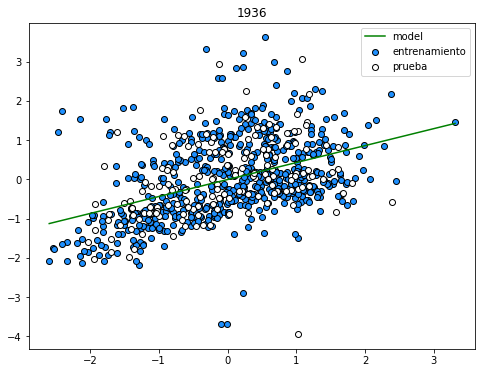

In [489]:
x_start = min(np.min(X_train), np.min(X_test))
x_end = max(np.max(X_train), np.max(X_test))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(8,6))

#Graficamos nuestro modelo
plt.plot(x, model.predict(x), color="green", label="model")

#Graficamos nuestro conjunto de datos
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test, y_test, facecolor="white", edgecolor="k", label="prueba")
plt.title(features_pequeño_xmin[0])
plt.legend()
plt.show()

Se puede ver que el feature 1936 se relaciona directamente lineal con la coordenada de X mínima del objeto con un error cuadrático considerablemente pequeño, el cual es menor para el conjunto de prueba que el del conjunto de entrenamiento.

*b) Tomar pares de características y considerar una como regresora y la otra como objetivo o variable/característica a predecir y realizar una regresión lineal y varias polinomiales (hasta grado 5) para evaluar el grado del polinomio que mejor se ajusta a las predicciones.*

Veamos cuáles pares tienen mayor linealidad:

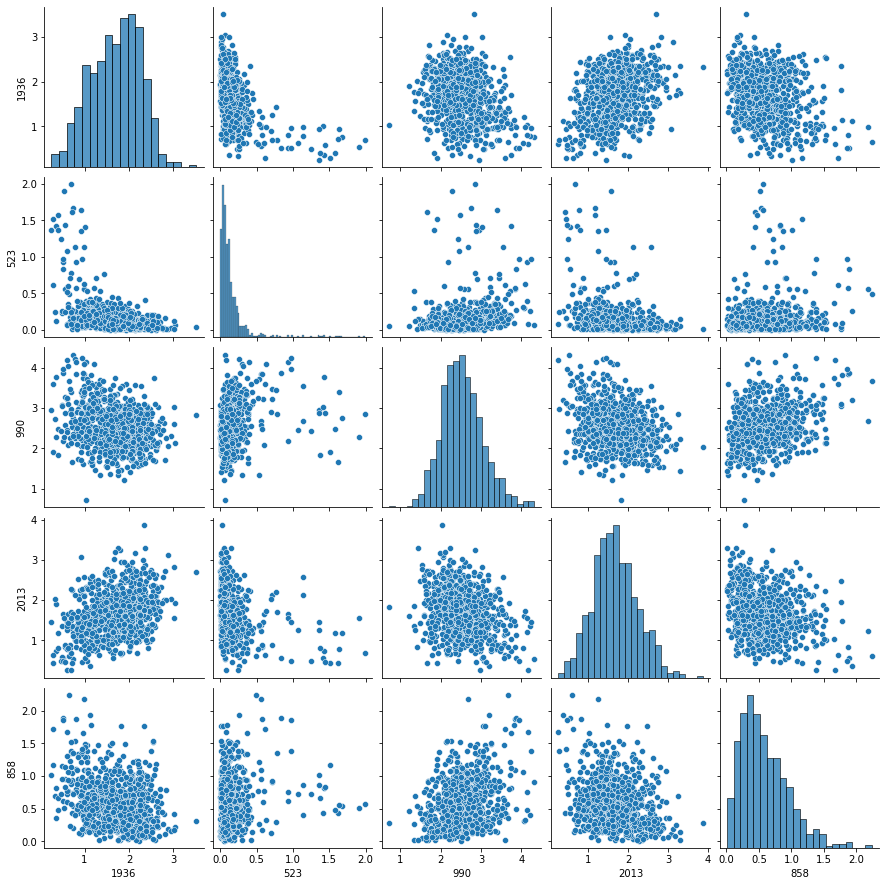

In [490]:
sns.pairplot(data=tabla_0_pequeño, vars=features_pequeño_xmin)

2013 y 1936 parecen tener una mayor linealidad que el resto de las gráficas.

In [526]:
#Separación de los datos
X_f, y_f = np.array(df_pequeño_xmin_scaled['2013']), np.array(df_pequeño_xmin_scaled['1936'])
X_train_f, X_test_f, y_train_f, y_test_f=train_test_split( X_f.reshape(-1,1), y_f.reshape(-1,1), train_size=0.80, random_state=0)


In [527]:
#Modelo
degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train_f)

#Predicción
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

#Evaluación
train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.87
Error en prueba: 0.8


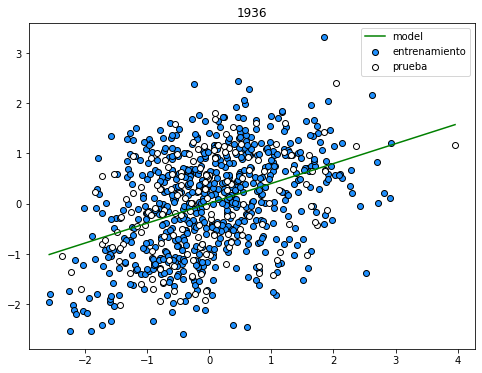

In [528]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(8,6))

#Graficamos nuestro modelo
plt.plot(x, model.predict(x), color="green", label="model")

#Graficamos nuestro conjunto de datos
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")
plt.title(features_maxcorr_xmin[0])
plt.legend()
plt.show()

Podemos apreciar que en los extremos de la gráfica, los datos no parecen ajustarse demasiado a una recta, pues se encuentran alejados de ella.

Ahora hacemos para varios grados:

In [529]:
train_errors = []
test_errors = []
sum_errors = []
degrees = [0, 1, 2, 3, 4, 5,6,7]
for degree in degrees:
    # Entrenamiento:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train_f)
    
    # Predicción:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # Evaluación:
    train_error = mean_squared_error(y_train_f, y_train_pred)
    test_error = mean_squared_error(y_test_f, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    sum_errors.append(train_error + test_error)

    print(f'Con grado {degree} en entrenamiento error: {train_error:0.2}, prueba: {test_error:0.2}, suma: {test_error+train_error:0.2}')

Con grado 0 en entrenamiento error: 1.0, prueba: 0.91, suma: 1.9
Con grado 1 en entrenamiento error: 0.87, prueba: 0.8, suma: 1.7
Con grado 2 en entrenamiento error: 0.85, prueba: 0.81, suma: 1.7
Con grado 3 en entrenamiento error: 0.85, prueba: 0.81, suma: 1.7
Con grado 4 en entrenamiento error: 0.84, prueba: 0.85, suma: 1.7
Con grado 5 en entrenamiento error: 0.84, prueba: 0.82, suma: 1.7
Con grado 6 en entrenamiento error: 0.84, prueba: 0.83, suma: 1.7
Con grado 7 en entrenamiento error: 0.84, prueba: 4.5, suma: 5.3


Graficamos las curvas de error:

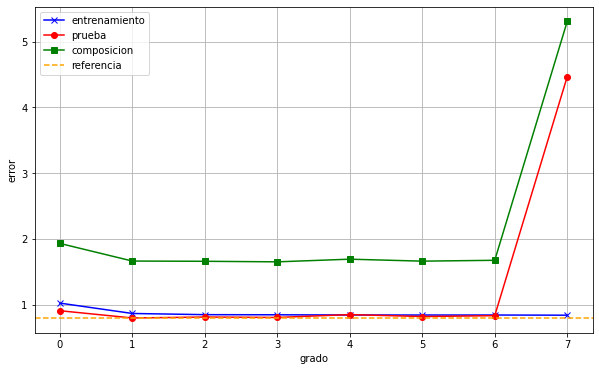

In [500]:
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, '-x', color="blue", label="entrenamiento")
plt.plot(degrees, test_errors, '-o', color="red", label="prueba")
plt.plot(degrees, sum_errors, '-s', color="g", label="composicion")

#Delimitamos el error mínimo que hubo en el conjunto de test
plt.axhline(0.8, ls = '--', color = 'orange', label="referencia")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.grid(True)
plt.show()

Podemos apreciar que el error en el conjunto de prueba es menor que el que aparece en el conjunto de entrenamiento hasta que modelamos con un polinomio de grado 6. El menor error de prueba se encuentra en el polinomio de grado 1, aunque puede ser interesante inspeccionar los demás grados que tienen incluso un error de entrenamiento menor.

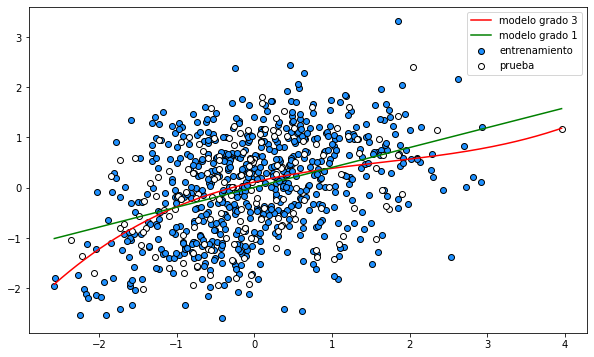

In [501]:
# Entrnamiento
degree3 = 3
model3 = make_pipeline(PolynomialFeatures(degree3), LinearRegression())
model3.fit(X_train_f, y_train_f)

degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train_f)

# Predicción
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

# Gráfico
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))

#Modelos
plt.plot(x, model3.predict(x), color="red", label="modelo grado 3")
plt.plot(x, model.predict(x), color="green", label="modelo grado 1")

#Conjunto de datos
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")
plt.legend()
plt.show()

Podemos observar que con el polinomio de grado 3, en los extremos, los datos se ajustan mejor a esta función que a la recta, pues estos se concentran más alrededor del polinomio.

*c) Luego realizar la búsqueda de los mejores hiperparámetros utilizando GridSearchCV en el conjunto Train, con RMSE o análoga como medida de calidad de ajuste. d) Una vez definidos los hiperparámetros (encontrados en la búsqueda del item anterior. Evaluar el modelo ajustado utilizando el conjunto Test, con la medida (o las medidas) que crea adecuada.*

Creamos nuestra grilla de parámetros:

In [502]:
param_grid = {
              'polynomialfeatures__degree': np.arange(5), 
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]
             }

Procedemos a realizar la búsqueda de parámetros:

In [508]:
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(), LinearRegression())

cv = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3)
cv.fit(X_train_f, y_train_f);

In [509]:
results = cv.cv_results_
df = pd.DataFrame(results)
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linearregression__fit_intercept,param_linearregression__normalize,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001769,0.000626,0.000620,0.000146,True,True,0,"{'linearregression__fit_intercept': True, 'lin...",-0.971643,-1.140096,-0.966381,-1.026040,0.080678,17
1,0.001077,0.000036,0.000592,0.000144,True,True,1,"{'linearregression__fit_intercept': True, 'lin...",-0.799443,-0.938676,-0.884146,-0.874088,0.057285,13
2,0.000801,0.000050,0.000415,0.000012,True,True,2,"{'linearregression__fit_intercept': True, 'lin...",-0.778622,-0.929704,-0.861338,-0.856554,0.061772,1


In [525]:
#Visualizamos los resultados
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print ("degree\t fit\t norm\t | mean\t std\t rank")

for p, m, s, r in zip(params, mean, std, rank):

    print(f"{p['polynomialfeatures__degree']}\t{p['linearregression__fit_intercept']}\t{p['linearregression__normalize']}\t|{m:0.2f}\t{s:0.2f}\t{r}"
          )

degree	 fit	 norm	 | mean	 std	 rank
0	True	True	|-1.03	0.08	17
1	True	True	|-0.87	0.06	13
2	True	True	|-0.86	0.06	1
3	True	True	|-0.86	0.07	9
4	True	True	|-0.86	0.07	6
0	True	False	|-1.03	0.08	17
1	True	False	|-0.87	0.06	13
2	True	False	|-0.86	0.06	1
3	True	False	|-0.86	0.07	10
4	True	False	|-0.86	0.07	5
0	False	True	|-1.03	0.08	17
1	False	True	|-0.87	0.06	13
2	False	True	|-0.86	0.06	1
3	False	True	|-0.86	0.07	10
4	False	True	|-0.86	0.07	6
0	False	False	|-1.03	0.08	17
1	False	False	|-0.87	0.06	13
2	False	False	|-0.86	0.06	1
3	False	False	|-0.86	0.07	10
4	False	False	|-0.86	0.07	6


El pilinomio de grado 2 parece tener mejor rankeo, y es el que menor RMSE promedio tiene.

In [511]:
#Predecimos con el nuevo modelo
best_model = cv.best_estimator_
y_best=best_model.predict(X_test_f)
y_train_best=best_model.predict(X_train_f)

#Evaluación
train_error = mean_squared_error(y_train_f, y_train_best)
test_error = mean_squared_error(y_test_f, y_best)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.85
Error en prueba: 0.81


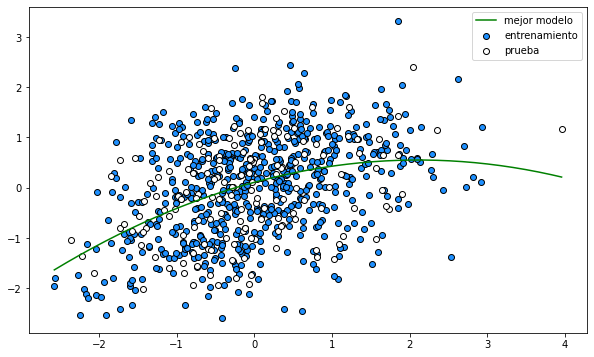

In [512]:
#graph
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.plot(x, best_model.predict(x), color="green", label="mejor modelo")

plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")

plt.legend()
plt.show()

Podemos ver que nuestro mejor modelo es hiperparabólico y se adapta a los lugares de mayor concentración de los datos que a los lugares donde hay más dispersión. Esto se puede apreciar en el valor 3 de la variable regresora.

* **Ahora para las imágenes grandes**



In [530]:
#Vemos los features relacionados con xmin que descubrimos en el práctico anterior
features_grande_xmin=['458', '1703', '1365', '1766', '480']


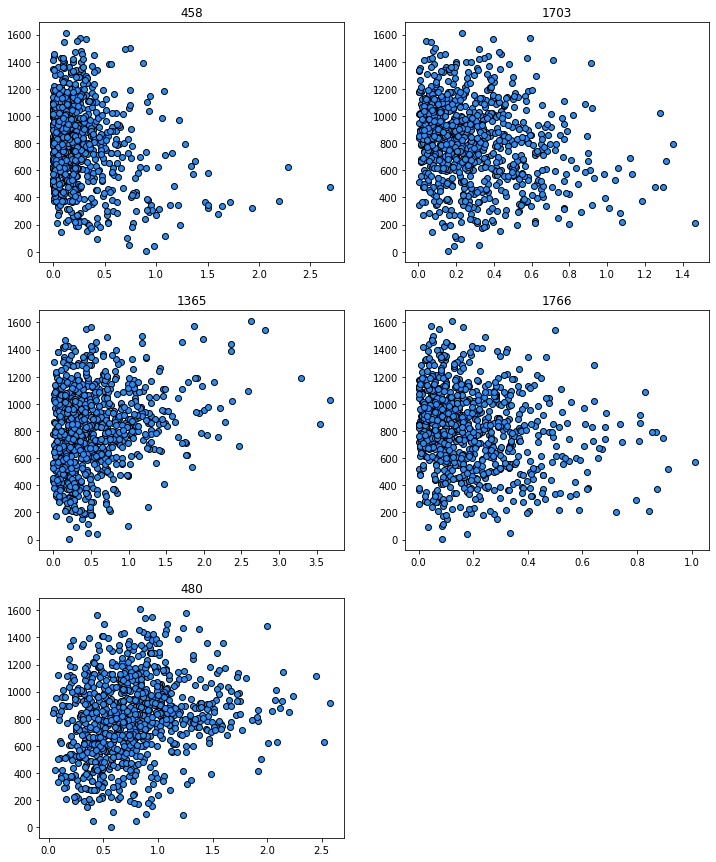

In [531]:
plt.figure(figsize=(12,15))
k=0

for i in features_grande_xmin:
 k=k+1
 plt.subplot(3,2,k) 
 plt.scatter(tabla_0_grande[i],tabla_0_grande['xmin'], facecolor="dodgerblue", edgecolor="k", label="datos") 
 plt.title(i)

Podemos ver que la característica 480 puede tener una mayor relación con la variable 'xmin'

In [532]:
#Escalamos una dimensión
array_grandes_xmin=np.array(tabla_0_grande['xmin'])
scaler_grande_xmin = preprocessing.StandardScaler().fit_transform(array_grandes_xmin.reshape(-1,1))

#Escalamos la característica
df_grande_xmin_array=np.array(tabla_0_grande[features_grande_xmin])
scaler_grande_df = preprocessing.StandardScaler().fit_transform(df_grande_xmin_array)

#Pasamos los datos a un dataframe
df_grande_xmin_scaled=pd.DataFrame(data=scaler_grande_df, index=tabla_0_grande.index, columns=features_grande_xmin)
df_grande_xmin_scaled['xmin']=scaler_grande_xmin
df_grande_xmin_scaled.head(3)

,458,1703,1365,1766,480,xmin
0,-0.408088,-0.267421,-0.688690,1.898415,-1.180053,-1.999422
1,-0.408911,-0.086223,-0.953412,-0.434352,0.889800,-0.656233
2,-0.787659,-0.487117,-0.636360,-0.157993,1.776291,0.212295


In [533]:
#Separación de nuestros datos
X, y = np.array(df_grande_xmin_scaled['480']), np.array(df_grande_xmin_scaled['xmin'])
X_train, X_test, y_train, y_test=train_test_split( X, y, train_size=0.80, random_state=0)
(X_train.reshape(-1,1)).shape, (y_train.reshape(-1,1)).shape

((697, 1), (697, 1))

In [534]:
#Modelo
degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

#Predicción
y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

#Evaluación
train_error = mean_squared_error(y_train.reshape(-1,1), y_train_pred)
test_error = mean_squared_error(y_test.reshape(-1,1), y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.99
Error en prueba: 0.85


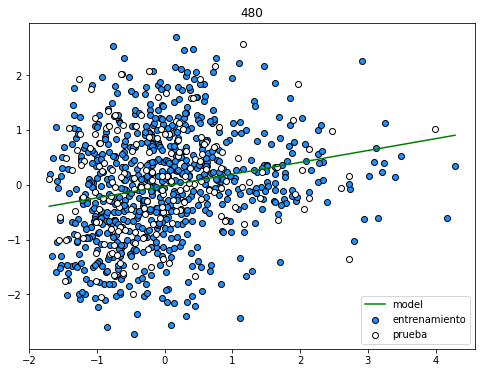

In [535]:
x_start = min(np.min(X_train.reshape(-1,1)), np.min(X_test.reshape(-1,1)))
x_end = max(np.max(X_train.reshape(-1,1)), np.max(X_test.reshape(-1,1)))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(8,6))

#Graficamos nuestro modelo
plt.plot(x, model.predict(x), color="green", label="model")

#Graficamos nuestro conjunto de datos
plt.scatter(X_train.reshape(-1,1), y_train.reshape(-1,1), facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test.reshape(-1,1), y_test, facecolor="white", edgecolor="k", label="prueba")
plt.title(features_grande_xmin[4])
plt.legend()
plt.show()

Se puede observar que hay demasiados puntos lejos de esta recta, y eso puede aumentar el error, tal vez una polinómica ajuste mejor a los datos.

* Ahora para un par de características: vemos cuales se correlacionan más


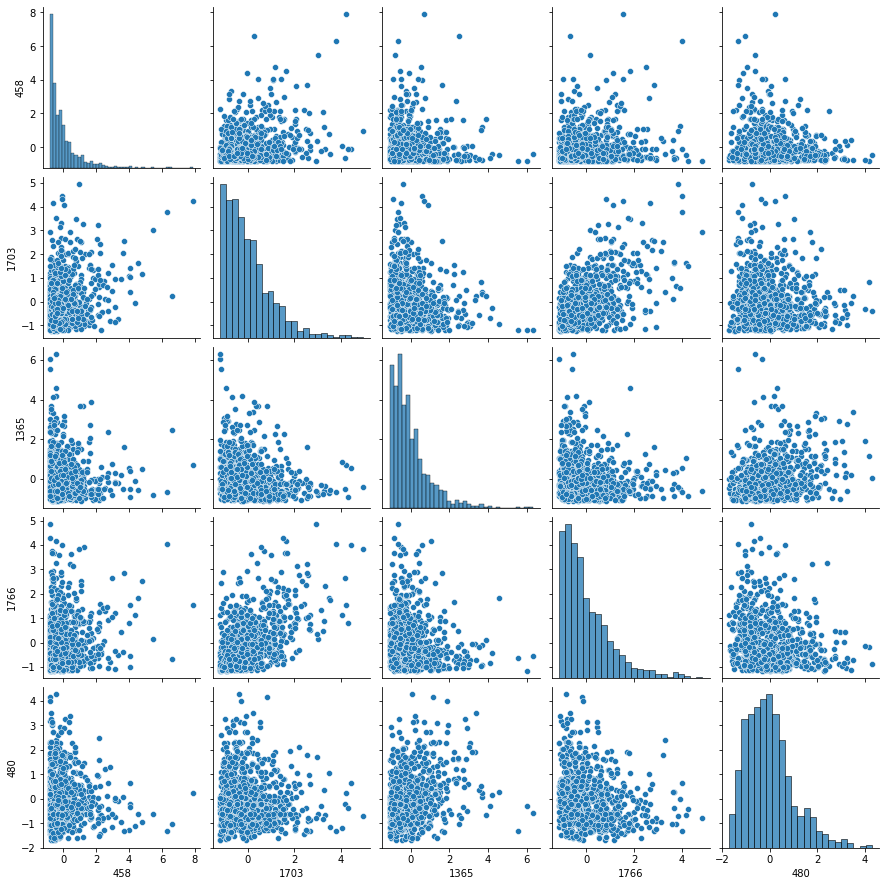

In [536]:
sns.pairplot(data=df_grande_xmin_scaled, vars=features_grande_xmin)

Podríamos establecer una relación entre la característica 480 y 458, que no es lineal pero se podría ajustar con un polinomio de grado mayor.

In [556]:
#Separación de los datos
X_f, y_f = np.array(df_grande_xmin_scaled['1766']), np.array(df_grande_xmin_scaled['1365'])
X_train_f, X_test_f, y_train_f, y_test_f=train_test_split( X_f.reshape(-1,1), y_f.reshape(-1,1), train_size=0.80, random_state=0)

In [557]:
#Modelo
degree = 1
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train_f)

#Predicción
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

#Evaluación
train_error = mean_squared_error(y_train_f, y_train_pred)
test_error = mean_squared_error(y_test_f, y_test_pred)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.99
Error en prueba: 0.93


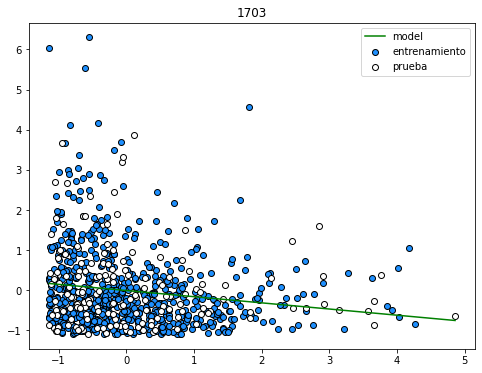

In [558]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(8,6))

#Graficamos nuestro modelo
plt.plot(x, model.predict(x), color="green", label="model")

#Graficamos nuestro conjunto de datos
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")
plt.title(features_grande_xmin[1])
plt.legend()
plt.show()

In [562]:
#Ahora para varios grados
train_errors = []
test_errors = []
sum_errors = []
degrees = [0, 1, 2, 3, 4, 5,6,7,8,9,10]
for degree in degrees:
    # Entrenamiento:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train_f)
    
    # Predicción:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # Evaluación:
    train_error = mean_squared_error(y_train_f, y_train_pred)
    test_error = mean_squared_error(y_test_f, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)
    sum_errors.append(train_error + test_error)

    #Viusalizamos el error que se produce con cada polinomio
    print(f'Con grado {degree} en entrenamiento error: {train_error:0.2}, prueba: {test_error:0.2}, suma: {test_error+train_error:0.2}')

Con grado 0 en entrenamiento error: 1.0, prueba: 0.94, suma: 2.0
Con grado 1 en entrenamiento error: 0.99, prueba: 0.93, suma: 1.9
Con grado 2 en entrenamiento error: 0.98, prueba: 0.93, suma: 1.9
Con grado 3 en entrenamiento error: 0.98, prueba: 0.93, suma: 1.9
Con grado 4 en entrenamiento error: 0.98, prueba: 0.93, suma: 1.9
Con grado 5 en entrenamiento error: 0.98, prueba: 0.96, suma: 1.9
Con grado 6 en entrenamiento error: 0.98, prueba: 0.94, suma: 1.9
Con grado 7 en entrenamiento error: 0.98, prueba: 0.94, suma: 1.9
Con grado 8 en entrenamiento error: 0.98, prueba: 1.3, suma: 2.2
Con grado 9 en entrenamiento error: 0.98, prueba: 2.5, suma: 3.5
Con grado 10 en entrenamiento error: 0.98, prueba: 2.3, suma: 3.3


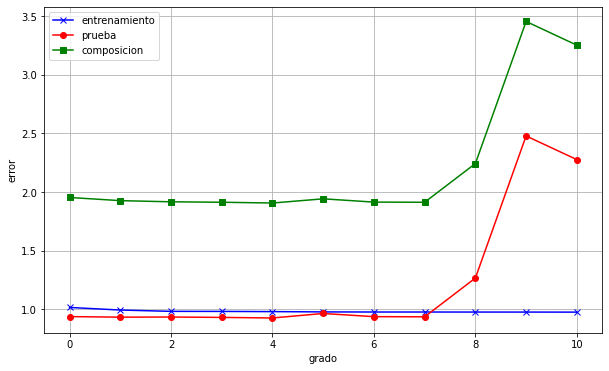

In [563]:
#Graficamos las curvas de error
plt.figure(figsize=(10,6))
plt.plot(degrees, train_errors, '-x', color="blue", label="entrenamiento")
plt.plot(degrees, test_errors, '-o', color="red", label="prueba")
plt.plot(degrees, sum_errors, '-s', color="g", label="composicion")
plt.legend()
plt.xlabel("grado")
plt.ylabel("error")
plt.grid(True)
plt.show()

Podemos observar que a partir del grado 7 el error de prueba comienza a crecer más que el error de entrenamiento, por lo que se podría indicar a partir de ese grado un overfitting. Por lo tanto nos centraremos en elegir polinomios de menor grado, por ejemplo 4.

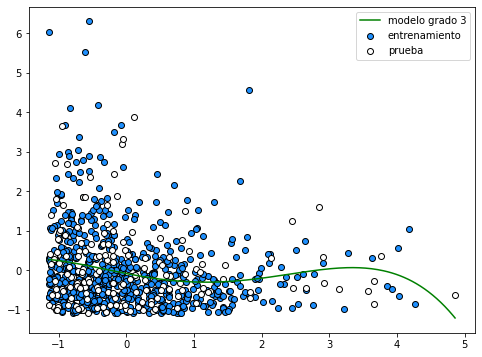

In [567]:
#Entrenamos con el mejor modelo según el que obtenga menor error de prueba
# train:
degree = 4
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train_f)

# predict:
y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

#graph
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(8,6))
plt.plot(x, model.predict(x), color="green", label="modelo grado 3")

plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")
#plt.title(feature)
plt.legend()
plt.show()

* Ahora con GridSearchCV

In [568]:
param_grid = {
              'polynomialfeatures__degree': np.arange(6), 
              'polynomialfeatures__order': ['C','F'],
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]
              }

In [569]:
model = make_pipeline(PolynomialFeatures(), LinearRegression())
cv = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
cv.fit(X_train_f, y_train_f);

In [570]:
results = cv.cv_results_
df = pd.DataFrame(results)
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linearregression__fit_intercept,param_linearregression__normalize,param_polynomialfeatures__degree,param_polynomialfeatures__order,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001312,0.000468,0.000737,0.000223,True,True,0,C,"{'linearregression__fit_intercept': True, 'lin...",-0.956928,-0.766390,-1.313238,-1.175757,-0.884130,-1.019288,0.198496,41
1,0.000828,0.000123,0.000410,0.000031,True,True,0,F,"{'linearregression__fit_intercept': True, 'lin...",-0.956928,-0.766390,-1.313238,-1.175757,-0.884130,-1.019288,0.198496,41
2,0.000839,0.000026,0.000451,0.000019,True,True,1,C,"{'linearregression__fit_intercept': True, 'lin...",-0.935134,-0.763519,-1.277265,-1.173243,-0.842542,-0.998341,0.195857,33


In [571]:
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("degree.\tfit\tnorm\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
    print(f"{p['polynomialfeatures__degree']}\t{p['linearregression__fit_intercept']}\t{p['linearregression__normalize']}\t| {m:0.2f}\t{s:0.2f}\t{r}")

degree.	fit	norm	| mean	std	rank
0	True	True	| -1.02	0.20	41
0	True	True	| -1.02	0.20	41
1	True	True	| -1.00	0.20	33
1	True	True	| -1.00	0.20	33
2	True	True	| -0.99	0.20	1
2	True	True	| -0.99	0.20	1
3	True	True	| -0.99	0.20	17
3	True	True	| -0.99	0.20	17
4	True	True	| -0.99	0.20	13
4	True	True	| -0.99	0.20	15
5	True	True	| -0.99	0.21	25
5	True	True	| -0.99	0.21	25
0	True	False	| -1.02	0.20	41
0	True	False	| -1.02	0.20	41
1	True	False	| -1.00	0.20	33
1	True	False	| -1.00	0.20	33
2	True	False	| -0.99	0.20	1
2	True	False	| -0.99	0.20	1
3	True	False	| -0.99	0.20	17
3	True	False	| -0.99	0.20	24
4	True	False	| -0.99	0.20	13
4	True	False	| -0.99	0.20	15
5	True	False	| -0.99	0.21	32
5	True	False	| -0.99	0.21	27
0	False	True	| -1.02	0.20	41
0	False	True	| -1.02	0.20	41
1	False	True	| -1.00	0.20	33
1	False	True	| -1.00	0.20	33
2	False	True	| -0.99	0.20	1
2	False	True	| -0.99	0.20	1
3	False	True	| -0.99	0.20	17
3	False	True	| -0.99	0.20	17
4	False	True	| -0.99	0.20	9
4	False	True	| -0.99	0.20	9
5

Parece que el polinomio de grado 2 tiene el mejor rank con respecto al error cuadrático medio.

In [572]:
#Predecimos con el nuevo modelo
best_model = cv.best_estimator_
y_best=best_model.predict(X_test_f)
y_train_best=best_model.predict(X_train_f)

#Evaluación
train_error = mean_squared_error(y_train_f, y_train_best)
test_error = mean_squared_error(y_test_f, y_best)
print(f'Error de entrenamiento: {train_error:0.2}')
print(f'Error en prueba: {test_error:0.2}')

Error de entrenamiento: 0.98
Error en prueba: 0.93


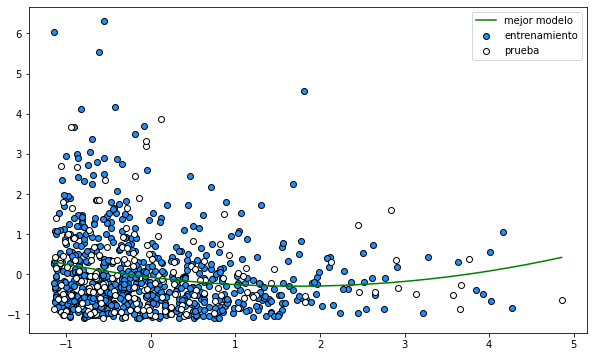

In [573]:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.figure(figsize=(10,6))

#Graficamos nuestro modelo
plt.plot(x, best_model.predict(x), color="green", label="mejor modelo")

#Graficamos nuestro conjunto de datos
plt.scatter(X_train_f, y_train_f, facecolor="dodgerblue", edgecolor="k", label="entrenamiento")
plt.scatter(X_test_f, y_test_f, facecolor="white", edgecolor="k", label="prueba")

plt.legend()
plt.show()

## Clasificadores

*Clasificación: De a pares de características, implementar los algoritmos de Perceptrón, SGD y Árboles de Decisión en el conjunto Train para clasificación binaria: guantes si - guantes no (algoritmos del paquete sklearn). Primero con los hiperparámetros por defecto y luego ir cambiándolos un poco.*

*Utilizar GridSearchCV para explorar las diferentes combinaciones de hiperparámetros.*

In [425]:
codificado_pequeño=tabla_0_pequeño.copy()
codificado_pequeño['guantes']=preprocessing.LabelEncoder() .fit_transform(tabla_0_pequeño['guantes'])
codificado_pequeño['color']=preprocessing.LabelEncoder() .fit_transform(tabla_0_pequeño['color'])
codificado_pequeño.head()

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
81,M_P_Mostrando_Amarillos_0_single_box.jpg,888,958,246,297,M,P,train,70,51,3570,1,0,0.145595,0.213514,0.791483,0.072909,0.097112,0.352617,0.259018,1.360401,0.550221,0.154716,0.021366,0.024072,0.949577,0.064469,0.284966,0.055286,0.345928,0.326021,0.793031,0.021018,0.026289,0.323501,0.217253,0.247845,0.000000,0.101313,0.169508,...,0.025705,0.417304,0.033816,0.173230,0.051771,1.415602,0.337321,0.975691,0.550020,0.641819,0.439040,0.029718,0.301447,0.116038,0.839936,0.124410,0.249364,0.014110,0.516542,0.389848,0.184664,0.209011,0.055636,0.754151,0.081306,0.112539,0.030242,0.100436,0.059771,0.097028,0.224595,0.477608,0.254312,0.466399,0.530521,1.133145,0.532193,0.372313,0.255801,0.007732
82,M_P_Mostrando_Amarillos_100_double_box1.jpg,1039,1126,152,213,M,P,train,87,61,5307,1,0,0.633379,0.302466,1.012172,0.099294,0.621903,0.316363,0.465347,0.853991,0.348377,0.533595,0.074831,0.039681,0.317442,0.000000,0.289752,0.113386,0.212390,0.039103,0.018105,0.190704,0.073810,0.538579,0.840063,0.128677,0.630762,0.083598,0.126321,...,0.493111,0.462204,0.077777,0.009331,0.571931,2.391589,0.827531,0.060029,0.321658,0.492403,1.175636,0.055608,0.406178,0.415775,1.158667,0.006724,0.033182,0.024130,1.273448,0.427369,0.344070,0.243982,0.014488,2.060503,0.372567,0.062778,0.772663,0.630821,0.237646,0.604410,0.252473,0.293842,0.053953,0.081763,1.139570,0.293480,0.567158,0.168934,2.355879,0.037785
83,M_P_Mostrando_Amarillos_100_double_box2.jpg,871,943,215,269,M,P,train,72,54,3888,1,0,0.319083,0.094527,1.127734,0.534825,0.190210,0.021705,0.687998,0.856857,0.183420,0.474442,0.044079,0.185068,0.509284,0.026576,0.106728,0.060262,0.263037,0.507972,0.818271,0.021119,0.121881,0.278807,0.396050,0.198627,0.027860,0.000000,0.164530,...,0.068353,0.626280,0.000000,0.245522,0.234813,1.132762,0.057690,0.483179,0.777851,0.194896,0.506794,0.051573,0.175273,0.012522,1.179126,0.221046,0.641441,0.569595,0.262994,0.444106,0.629760,0.600889,0.173166,0.754283,0.377667,0.170891,0.124353,0.112478,0.061948,0.029943,0.440217,0.215177,0.495561,0.172839,1.033710,0.106296,0.377070,0.361771,0.199704,0.013590
84,M_P_Mostrando_Amarillos_10_single_box.jpg,786,825,224,273,M,P,train,39,49,1911,1,0,0.197739,0.013961,1.408641,0.175166,0.251813,0.085982,0.406800,0.667196,0.542266,0.132715,0.000000,0.032831,0.417020,0.230002,0.000000,0.000584,0.261363,0.801301,0.385944,0.031844,0.017942,0.065300,0.523358,0.217141,0.044985,0.076430,0.057129,...,0.033693,0.492676,0.000000,0.051219,0.356656,1.458888,0.044209,0.205244,0.200680,0.208520,0.907671,0.103609,0.245072,0.174300,0.657183,0.002458,0.407922,0.657996,0.136228,0.116019,0.498531,0.257284,0.132322,1.231766,0.148895,0.103609,0.109232,0.008206,0.053224,0.049139,0.372761,0.751837,0.160556,0.253747,1.859141,0.049466,0.700408,0.082716,0.077863,0.000677
85,M_P_Mostrando_Amarillos_110_double_box1.jpg,988,1050,244,296,M,P,train,62,52,3224,1,0,0.016625,0.319181,0.699352,0.021068,0.072414,0.142063,0.261854,0.670813,1.015223,0.124863,0.035095,0.053907,0.508308,0.421238,0.062072,0.022632,0.470993,0.070397,0.024676,0.193389,0.057658,0.138698,0.183891,0.122445,0.048152,0.232768,0.446347,...,0.016805,0.072712,0.009410,0.454008,0.222385,2.464293,1.135042,0.233880,0.034567,1.043756,0.357322,0.185957,0.069455,0.043992,0.446661,0.406829,0.407048,0.133187,0.292348,0.298762,0.136744,0.216321,0.556162,0.838409,0.473377,0.080431,0.331338,0.076842,0.281634,0.102907,0.399727,0.210005,0.161583,0.100478,0.663306,0.393639,0.682728,0.113168,0.041992,0.000000


Los features que se encontraban más correlacionados con nuestras categorías de 'guantes' eran:

In [426]:
features_guantes_pequeño=['518', '1563']

In [427]:
#Variables de interés: etiquetas: codificado_pequeño['guantes'], X_train=feature_guantes
codificado_pequeño[features_guantes_pequeño]

,518,1563
81,0.496787,0.774287
82,1.079900,0.568232
83,1.237995,1.301334
84,1.009581,0.879101
85,0.362154,0.168703
...,...,...
1663,0.784744,0.380032
1664,0.021945,0.353489
1665,0.852391,0.275772
1666,0.544776,0.516550


* Primero normalizamos los datos para que no haya ninguna predominancia

In [428]:
#Escalamos las característica
var_pequeño_guantes=np.array(codificado_pequeño[features_guantes_pequeño])
var_pequeño_guantes_sc = preprocessing.StandardScaler().fit_transform(var_pequeño_guantes)

#Pasamos los datos a un dataframe
df_var_pequeño_guantes=pd.DataFrame(data=var_pequeño_guantes_sc, index=codificado_pequeño.index, columns=features_guantes_pequeño)
df_var_pequeño_guantes.head(3)

,518,1563
81,-0.398746,0.945112
82,0.819143,0.373284
83,1.149340,2.407732


Vectorizamos nuestras variables:

In [429]:
codificado_array=np.array(df_var_pequeño_guantes)
codificado_array.shape

(796, 2)

In [430]:
array_guantes=np.array(codificado_pequeño['guantes'])
array_guantes_vect=array_guantes.reshape(-1,1)
array_guantes_vect.shape

(796, 1)

Separación de nuestros datos:

In [431]:
X, y=codificado_array, array_guantes
X_train, X_test, y_train, y_test=train_test_split( X, y, train_size=0.80, random_state=0)

Graficamos nuestro conjunto de datos

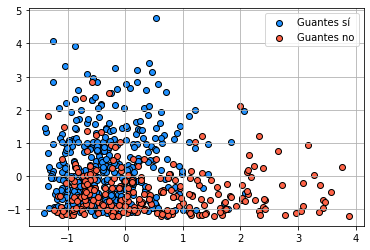

In [432]:
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.grid()
plt.legend()
plt.show()

A simple vista podemos ver que nuestros datos no son linealmente separables, por lo tanto una clasificación que consista únicamente de una recta no sería propicio para nuestros datos.

#Perceptrón

Realizamos la primer predicción con un modelo de perceptrón sin modificar sus hiperparámetros más que su "random state"

In [59]:
from sklearn.linear_model import Perceptron

In [433]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [434]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([clf.score(X_train, y_train), clf.score(X_test, y_test)])

[0.6147798742138365, 0.56875]

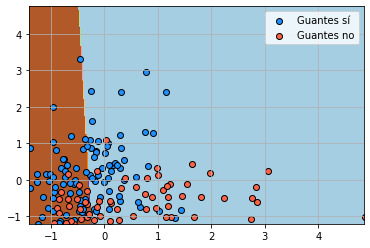

In [435]:
#Graficamos nuestra frontera de decisión

x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")
plt.grid()
plt.legend()
plt.show()

Se puede apreciar que nuestro modelo puede estar overfittenado pues el accuracy logrado con nuestro conjunto de entrenamiento es mayor que el logrado con nuestro conjunto de test.

* Ahora con GridSearchCV

Ahora probamos cambiando los hiperparámetros haciendo una búsqueda de los mejores con GridShearchCV.

In [436]:
params_perceptron={'alpha': np.linspace(0,3,10), 
                   'early_stopping': [False, True], 
                   'eta0': [0.02,0.03,0.08,0.3,0.5,0.8,1,2,3,4,5,6,7,8],
                   'fit_intercept':[True, False],
                   'penalty':[ 'l2', 'l1', 'elasticnet'],
                  }

In [437]:
cv = GridSearchCV(clf, params_perceptron, scoring='accuracy', cv=5)
cv.fit(X_train,y_train);

In [438]:
result_perceptron=cv.cv_results_
rtdos_perceptron=pd.DataFrame(result_perceptron)
rtdos_perceptron.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_early_stopping,param_eta0,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001987,0.000530,0.000689,0.000271,0,False,0.02,True,l2,"{'alpha': 0.0, 'early_stopping': False, 'eta0'...",0.585938,0.645669,0.661417,0.645669,0.692913,0.646321,0.034773,125
1,0.001092,0.000032,0.000332,0.000022,0,False,0.02,True,l1,"{'alpha': 0.0, 'early_stopping': False, 'eta0'...",0.585938,0.645669,0.661417,0.645669,0.692913,0.646321,0.034773,125
2,0.001119,0.000059,0.000345,0.000028,0,False,0.02,True,elasticnet,"{'alpha': 0.0, 'early_stopping': False, 'eta0'...",0.585938,0.645669,0.661417,0.645669,0.692913,0.646321,0.034773,125
3,0.001041,0.000031,0.000341,0.000023,0,False,0.02,False,l2,"{'alpha': 0.0, 'early_stopping': False, 'eta0'...",0.406250,0.708661,0.685039,0.771654,0.700787,0.654478,0.127563,103
4,0.001065,0.000019,0.000340,0.000026,0,False,0.02,False,l1,"{'alpha': 0.0, 'early_stopping': False, 'eta0'...",0.406250,0.708661,0.685039,0.771654,0.700787,0.654478,0.127563,103


In [439]:
mejor_perceptron=cv.best_estimator_
mejor_perceptron.fit(X_train, y_train)

Perceptron(alpha=0.3333333333333333, class_weight=None, early_stopping=False,
           eta0=0.03, fit_intercept=True, max_iter=1000, n_iter_no_change=5,
           n_jobs=None, penalty='l2', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [440]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([mejor_perceptron.score(X_train, y_train), mejor_perceptron.score(X_test, y_test)])

[0.7059748427672956, 0.73125]

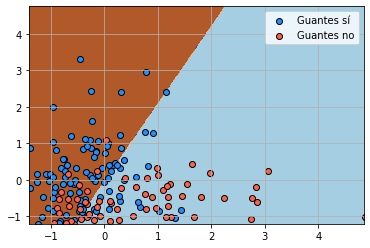

In [441]:
#Graficamos nuestra frontera de decisión
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

Con la búsqueda de hiperparámetros con GirdSearchCV el modelo dejó de overfittear y alcanzamos un 20% más en la precisión sobre nuestro conjunto de test.

#SGD Classifier

In [442]:
#Gradiente descendente
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
GD= SGDClassifier(random_state=0)

In [443]:
GD.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [444]:
#Entrenamiento
GD.fit(X_train, y_train)

#Predicción
y_train_pred_GD = GD.predict(X_train)
y_test_pred_GD  = GD.predict(X_test)

In [445]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([GD.score(X_train, y_train), GD.score(X_test, y_test)])

[0.7059748427672956, 0.76875]

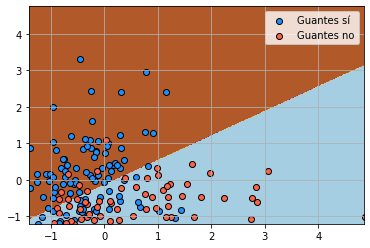

In [446]:
#Graficamos nuestra frontera de decision
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = GD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

* Ahora con GridSearchCV

In [447]:
param_sgd={'learning_rate':['optimal'], 
           'loss':['perceptron', 'log', 'hinge'],
           'penalty':['l1', 'l2', 'elasticnet'], 
           'l1_ratio': np.linspace(0, 1, 13),
           'alpha': np.logspace(-5, 0, 9),
           'eta0':[0]}

In [448]:
GSCV = GridSearchCV(GD, param_sgd, cv=5, scoring='accuracy') 
GSCV.fit(X_train, y_train);

In [449]:
result_SGD=GSCV.cv_results_
rtdos_SGD=pd.DataFrame(result_SGD)
rtdos_SGD.sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_l1_ratio,param_learning_rate,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
561,0.002137,0.000225,0.000315,0.000007,0.00316228,0,0.833333,optimal,log,l1,"{'alpha': 0.0031622776601683794, 'eta0': 0, 'l...",0.6875,0.716535,0.771654,0.795276,0.80315,0.754823,0.045285,1
579,0.002132,0.000238,0.000297,0.000015,0.00316228,0,1,optimal,log,l1,"{'alpha': 0.0031622776601683794, 'eta0': 0, 'l...",0.6875,0.716535,0.771654,0.795276,0.80315,0.754823,0.045285,1
572,0.002107,0.000208,0.000286,0.000005,0.00316228,0,0.916667,optimal,log,elasticnet,"{'alpha': 0.0031622776601683794, 'eta0': 0, 'l...",0.6875,0.716535,0.771654,0.795276,0.80315,0.754823,0.045285,1


In [450]:
mejor_SGD=GSCV.best_estimator_

In [451]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([mejor_SGD.score(X_train, y_train), mejor_SGD.score(X_test, y_test)])

[0.7515723270440252, 0.8]

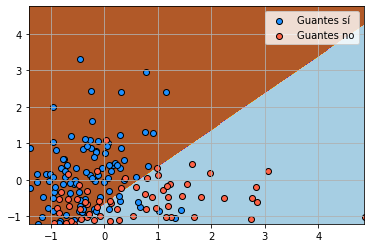

In [452]:
#Graficamos nuestra frontera de decision
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_SGD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

Se puede apreciar que se pudieron clasificar todos los datos que sí tenían guantes (azul), y quedaron tres que no se pudieron clasificar bien (color morado).

# Arbol de decisiones

In [246]:
from sklearn.tree import DecisionTreeClassifier


In [453]:
#Entrenamiento
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

#Predicción
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#Evaluación
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.7


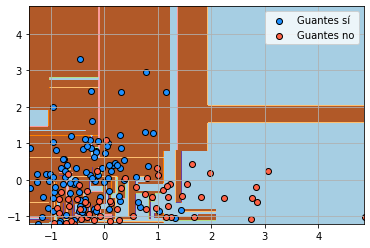

In [454]:
#Graficamos nuestras fronteras de decisiones
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

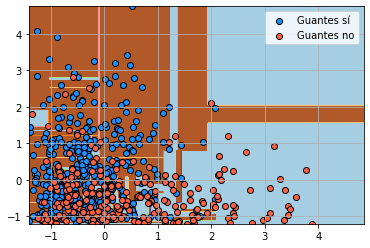

In [455]:
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de train
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

In [456]:
print('Profundidad máxima:', clf.get_depth())
print('Cantida de hojas  :', clf.get_n_leaves())

Profundidad máxima: 26
Cantida de hojas  : 185


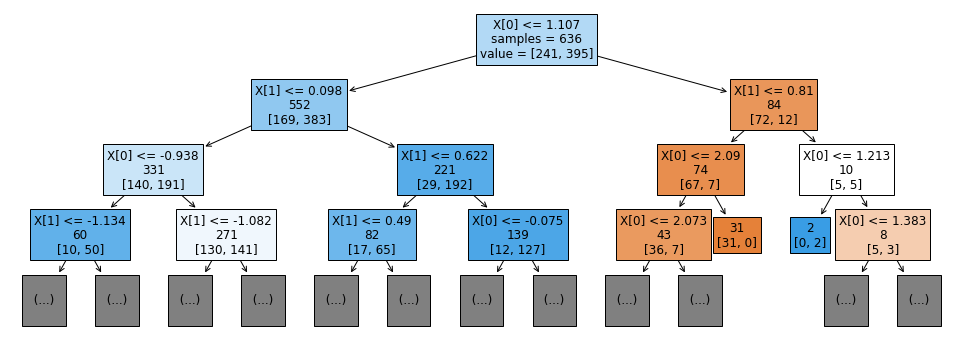

In [457]:
from sklearn.tree import plot_tree
plt.figure(figsize=(17,6))
plot_tree(clf, impurity=False, filled=True, max_depth=3, fontsize=12, label='root')
plt.show()

Podemos ver que el modelo separa en más de dos clases y están desbalanceadas.

* Ahora con GridSearchCV

In [469]:
param_arbol = {
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(1,9),
          'min_samples_split': np.arange(2,10),
          'min_samples_leaf': np.arange(1,6),
          'max_leaf_nodes': np.arange(1,6),
          'min_impurity_decrease': np.linspace(0,1,10)
          }

In [470]:
clf_par = GridSearchCV(clf, param_arbol, cv=5, refit='accuracy', scoring=['accuracy'], n_jobs=-1) 
clf_par.fit(X_train, y_train);

In [471]:
result_arbol=clf_par.cv_results_
rtdos_arbol=pd.DataFrame(result_arbol)
rtdos_arbol.sort_values(by='rank_test_accuracy').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
17239,0.005484,0.004047,0.000549,0.000079,entropy,1,4,0,5,9,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.710938,0.669291,0.677165,0.76378,0.740157,0.712266,0.036089,1
17208,0.002063,0.001284,0.000520,0.000052,entropy,1,4,0,2,2,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.710938,0.669291,0.677165,0.76378,0.740157,0.712266,0.036089,1
17207,0.002783,0.002893,0.001894,0.002832,entropy,1,4,0,1,9,"{'criterion': 'entropy', 'max_depth': 1, 'max_...",0.710938,0.669291,0.677165,0.76378,0.740157,0.712266,0.036089,1


In [472]:
mejor_arbol=clf_par.best_estimator_

In [473]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([mejor_arbol.score(X_train, y_train), mejor_arbol.score(X_test, y_test)])

[0.7154088050314465, 0.70625]

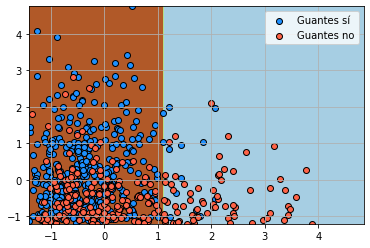

In [475]:
#Graficamos nuestras fronteras de decisión
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_arbol.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de datos train
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

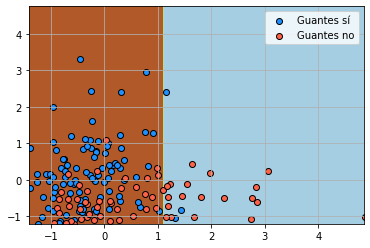

In [476]:
#Graficamos nuestras fronteras de decisión
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_arbol.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de datos test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

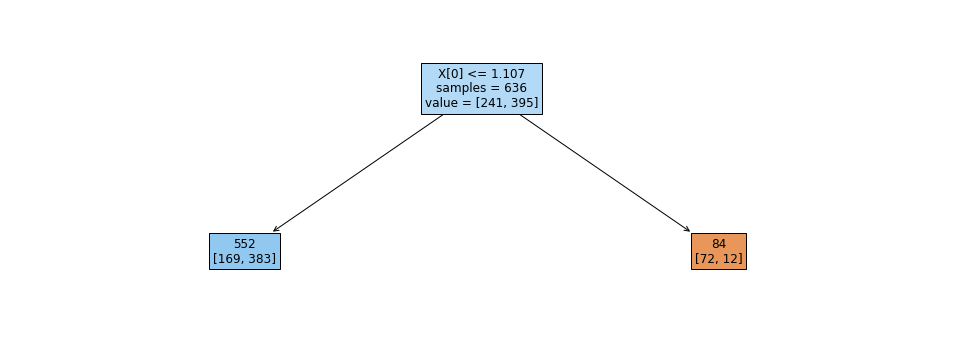

In [477]:
plt.figure(figsize=(17,6))
plot_tree(mejor_arbol, impurity=False, filled=True, fontsize=12, label='root')
plt.show()

Las clases se redujeron a 2 pero sigue habiendo desbalanceo. El overfitting disminuyó pero no se terminó de solucionar.

In [478]:
#Parámetros encontrados
mejor_arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': 2,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

A simple vista podríamos decir que las variables que se eligieron pudieron haber sido otras en las que haya una mayor separación con respecto a si hay guantes o no.. tal vez buscando aquellos features donde haya una mayor separabilidad entre los datos y se correspondan con la distinción de si hay guantes o no. La correlación se hizo sobre una etiqueta y no sobre una verdadera exploración. 

* **Ahora para imágenes grandes**

In [278]:
codificado_grande=tabla_0_grande.copy()
codificado_grande['guantes']=preprocessing.LabelEncoder() .fit_transform(tabla_0_grande['guantes'])
codificado_grande['color']=preprocessing.LabelEncoder() .fit_transform(tabla_0_grande['color'])
codificado_grande.head()

,filename,xmin,xmax,ymin,ymax,Time,Size,Type,Hand_Pixel_Width,Hand_Pixel_Height,Area,guantes,color,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,M_G_Mostrando_Amarillos_0_double_box1.jpg,218,461,464,715,M,G,train,243,251,60993,1,0,0.740974,1.066019,0.132695,0.224892,0.140456,0.129134,0.201447,1.076733,0.461108,0.299800,0.457940,0.201904,0.569677,0.737381,0.480929,0.200076,0.018410,0.674050,0.028826,0.005310,0.128693,0.592353,0.138541,0.141684,0.363294,0.264674,0.519292,...,0.463567,0.091676,0.300955,0.696112,2.409413,0.536980,0.102273,0.157441,0.165093,1.067619,0.751934,0.231443,0.487437,0.446320,0.822407,0.527523,0.217110,0.489194,1.535306,0.521390,0.599480,0.201182,0.391337,0.040206,1.347440,0.448389,0.462778,0.590751,0.877142,0.009986,0.939221,0.859877,0.981910,0.356366,1.748501,0.288037,0.079172,0.266234,0.078312,0.421612
1,M_G_Mostrando_Amarillos_0_double_box2.jpg,617,865,432,598,M,G,train,248,166,41168,1,0,1.621832,0.208859,0.627041,0.061717,0.052486,0.064176,0.479256,1.068516,0.509059,0.207385,0.218195,0.169190,0.695486,0.237641,0.146711,0.126334,0.029900,0.148363,0.126833,0.181351,0.044585,0.447270,0.134360,0.113650,1.153900,0.653832,0.041024,...,0.816892,0.027489,0.183116,0.626535,1.734605,0.672962,0.030057,0.101685,0.295544,0.392251,0.874054,0.105285,0.110713,0.421417,1.335695,0.500971,1.139208,0.110803,0.850265,0.618181,0.077352,0.376629,0.319234,0.783792,0.427963,0.133063,0.064981,0.017857,0.320706,0.219192,1.199712,0.808466,0.491182,0.356616,0.812572,0.481357,0.071471,0.572322,0.052072,0.213453
2,M_G_Mostrando_Amarillos_105_double_box1.jpg,875,1169,321,450,M,G,train,294,129,37926,1,0,0.777015,0.350298,0.523675,0.141681,0.008227,0.364888,0.559975,1.060057,0.648008,0.075809,0.419526,0.200864,0.553840,0.182195,0.244877,0.038389,0.046786,0.020999,0.281995,0.016088,0.135179,0.635030,0.276898,0.014077,0.613297,0.622520,0.117482,...,0.250315,0.025067,0.150927,0.604435,1.067641,0.847809,0.220889,0.298962,0.535717,0.566534,0.531686,0.208911,0.254966,0.229268,1.809620,0.362365,0.468568,0.055350,1.388036,0.884211,0.340101,0.305252,0.343156,1.061346,1.043128,0.004126,0.033861,0.020319,0.621639,0.040598,0.916142,0.246840,0.688755,0.101427,0.917090,0.407893,0.343683,0.428996,0.080831,0.005678
3,M_G_Mostrando_Amarillos_105_double_box2.jpg,502,758,145,307,M,G,train,256,162,41472,1,0,0.206803,0.032262,0.783582,0.104788,0.198923,0.229943,0.102975,1.872409,0.646370,0.369061,0.323460,0.136720,0.515654,0.139382,0.084579,0.205710,0.007865,0.329643,0.279838,0.096330,0.003207,0.161915,0.546153,0.034820,0.178539,0.245108,0.190008,...,0.146642,0.114052,0.005513,0.370992,0.665213,1.402337,0.162487,0.155748,0.241372,0.702011,0.993891,0.174953,0.551115,0.294757,0.660277,0.545881,0.343379,0.348534,0.342936,0.632171,0.079185,0.238604,0.062875,0.798502,1.009929,0.130553,0.003187,0.115578,0.427998,0.110039,0.992854,0.904692,0.112806,0.488674,1.150740,0.275088,0.254404,0.455159,0.012721,0.091329
4,M_G_Mostrando_Amarillos_114_double_box1.jpg,916,1151,285,463,M,G,train,235,178,41830,1,0,0.683246,0.319097,0.322898,0.489538,0.152056,0.593756,0.177822,1.093265,0.949665,0.154196,0.645907,0.270926,0.383814,0.204949,0.398145,0.102344,0.060811,0.121956,0.028302,0.120451,0.244606,0.387735,0.251303,0.236359,0.880333,0.466272,0.185311,...,0.652505,0.140662,0.354066,0.571745,2.067905,1.038591,0.099552,0.280820,0.516782,0.820352,0.601326,0.042655,0.119472,0.094523,2.042640,0.790532,0.266744,0.056142,0.620942,0.859705,0.439731,0.290626,0.310608,0.721135,0.988298,0.026431,0.317181,0.199194,0.524838,0.139992,1.304742,0.415517,0.652986,0.141079,1.024287,0.117491,0.007151,0.294575,0.217550,0.240535


In [295]:
features_guantes_grandes=['1202', '1933']

* Primero normalizamos nuestros datos para que no haya ninguna predominancia.

In [297]:
#Escalamos las característica
var_grande_guantes=np.array(codificado_grande[features_guantes_grandes])
var_grande_guantes_sc = preprocessing.StandardScaler().fit_transform(var_grande_guantes)

#Pasamos los datos a un dataframe
df_var_grande_guantes=pd.DataFrame(data=var_grande_guantes_sc, index=codificado_grande.index, columns=features_guantes_grandes)
df_var_grande_guantes.head(3)

,1202,1933
0,-0.552839,0.494402
1,0.498648,-0.281396
2,0.161968,-0.003393


In [298]:
codificado_array_grandes=np.array(df_var_grande_guantes)
codificado_array_grandes.shape

(872, 2)

In [299]:
array_guantes_grandes=np.array(codificado_grande['guantes'])
array_guantes_vect_g=array_guantes_grandes.reshape(-1,1)
array_guantes_vect_g.shape

(872, 1)

In [300]:
#Separación de nuestros datos:
X, y=codificado_array_grandes, array_guantes_grandes
X_train, X_test, y_train, y_test=train_test_split( X, y, train_size=0.80, random_state=0)

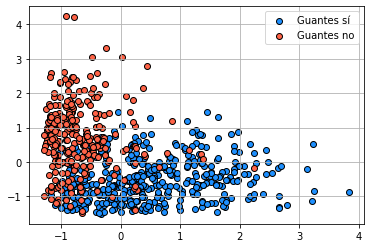

In [301]:
#Graficamos nuestro conjunto de datos:
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")
plt.grid()
plt.legend()
plt.show()

Nuestro conjunto de datos no es linealmente separable, y algunos datos están en el lugar de la otra clasificación.

## Perceptrón

Realizamos un modelo de perceptrón con el parámetro random state en cero para que sea reproducible

In [302]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [303]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([clf.score(X_train, y_train), clf.score(X_test, y_test)])

[0.830703012912482, 0.8285714285714286]

Se puede ver que el modelo está overfitteando, pues la precisión en los datos de entrenamiento es mayor que en los de prueba.

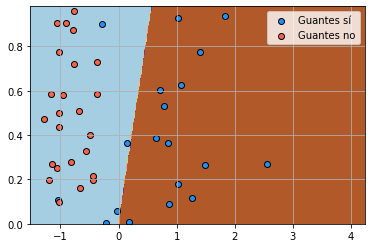

In [304]:
#Graficamos nuestro modelo para el conjunto de test

x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

* Probamos con GridSearchCV:

In [355]:
params_perceptron={'alpha': np.linspace(0,1,10), 
                   'eta0': np.linspace(0.1,1,10),
                   'fit_intercept':[True, False],
                   'penalty':['l2','l1', 'elasticnet'],
                  }

In [356]:
#from sklearn.model_selection import RandomizedSearchCV
cv = GridSearchCV(clf, params_perceptron, scoring='accuracy', cv=5)
cv.fit(X_train,y_train);

In [357]:
result_perceptron=cv.cv_results_
rtdos_perceptron=pd.DataFrame(result_perceptron)
rtdos_perceptron.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_fit_intercept,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001215,0.000062,0.000417,0.000053,0,0.1,True,l2,"{'alpha': 0.0, 'eta0': 0.1, 'fit_intercept': T...",0.85,0.85,0.848921,0.870504,0.870504,0.857986,0.010228,1
1,0.001169,0.000050,0.000361,0.000020,0,0.1,True,l1,"{'alpha': 0.0, 'eta0': 0.1, 'fit_intercept': T...",0.85,0.85,0.848921,0.870504,0.870504,0.857986,0.010228,1
2,0.001210,0.000033,0.000347,0.000017,0,0.1,True,elasticnet,"{'alpha': 0.0, 'eta0': 0.1, 'fit_intercept': T...",0.85,0.85,0.848921,0.870504,0.870504,0.857986,0.010228,1


In [358]:
#Entrenamos el mejor modelo
mejor_perceptron=cv.best_estimator_
mejor_perceptron.fit(X_train, y_train)

Perceptron(alpha=0.0, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l2', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [359]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([mejor_perceptron.score(X_train, y_train), mejor_perceptron.score(X_test, y_test)])

[0.8407460545193687, 0.84]

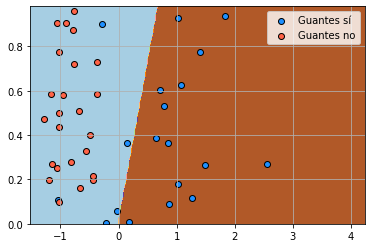

In [360]:
#Graficamos la función de desición
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos para el conjunto de test..
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

Podemos ver que el overfitting disminuyo bastante, a la vez que aumentó la precisión en ambos conjuntos.

## SGD classifier


In [375]:
SGD_G= SGDClassifier(random_state=0)

In [376]:
#Entrenamiento
SGD_G.fit(X_train, y_train)

#Predicción
y_train_pred_GD = SGD_G.predict(X_train)
y_test_pred_GD  = SGD_G.predict(X_test)

In [377]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([SGD_G.score(X_train, y_train), SGD_G.score(X_test, y_test)])

[0.7862266857962698, 0.7942857142857143]

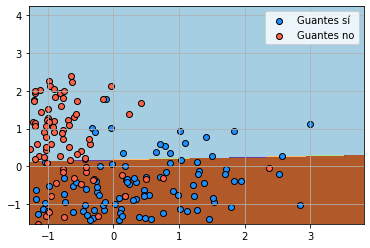

In [378]:
#Graficamos nuestra frontera de decisión

x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = SGD_G.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test..
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

Podemos ver que hay una de las dos clases que no está clasificando bien.

* Ahora con GridSearchCV

In [379]:
param_sgd={'learning_rate':['optimal'], 
           'loss':['perceptron', 'log', 'hinge'],
           'penalty':['l2','l1', 'elasticnet'], 
           'l1_ratio': np.linspace(0, 1, 13),
           'alpha': np.logspace(-12, 0,24),
           'eta0':[0]
           }

In [380]:
GSCV = GridSearchCV(SGD_G, param_sgd, cv=5, scoring='accuracy') 
GSCV.fit(X_train, y_train);

In [381]:
result_SGD=GSCV.cv_results_
rtdos_SGD=pd.DataFrame(result_SGD)
rtdos_SGD.sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_l1_ratio,param_learning_rate,param_loss,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
795,0.001199,0.000074,0.000290,0.000009,1.35031e-09,0,0.833333,optimal,log,l2,"{'alpha': 1.3503140378698723e-09, 'eta0': 0, '...",0.871429,0.85,0.899281,0.899281,0.863309,0.87666,0.019696,1
750,0.001218,0.000056,0.000285,0.000007,1.35031e-09,0,0.416667,optimal,log,l2,"{'alpha': 1.3503140378698723e-09, 'eta0': 0, '...",0.871429,0.85,0.899281,0.899281,0.863309,0.87666,0.019696,1
741,0.001202,0.000074,0.000294,0.000011,1.35031e-09,0,0.333333,optimal,log,l2,"{'alpha': 1.3503140378698723e-09, 'eta0': 0, '...",0.871429,0.85,0.899281,0.899281,0.863309,0.87666,0.019696,1


In [382]:
mejor_SGD=GSCV.best_estimator_

In [383]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([mejor_SGD.score(X_train, y_train),mejor_SGD.score(X_test, y_test)])

[0.806312769010043, 0.8114285714285714]

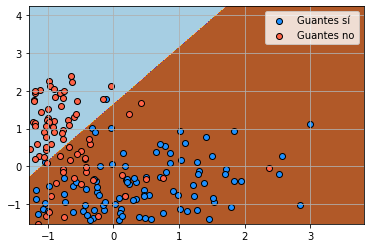

In [384]:
#Graficamos la frontera de decision..
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))
Z = mejor_SGD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

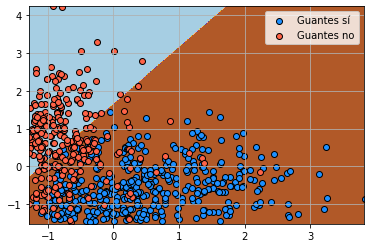

In [385]:
#Graficamos la frontera de decision..
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_SGD.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de entrenamiento
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

##Arbol de decisiones

In [387]:
from sklearn.tree import DecisionTreeClassifier
clf =  DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [388]:
#Predicción
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#Evaluación
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 1.0
Test accuracy: 0.82


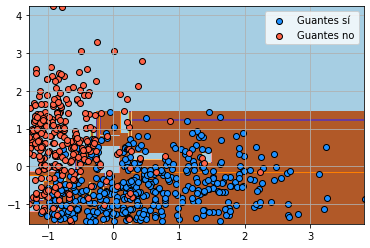

In [389]:
# Graficamos nuestras fronteras de decision
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos el conjunto de entrenamiento
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

In [390]:
print('Profundidad máxima:', clf.get_depth())
print('Cantida de hojas  :', clf.get_n_leaves())

Profundidad máxima: 12
Cantida de hojas  : 105


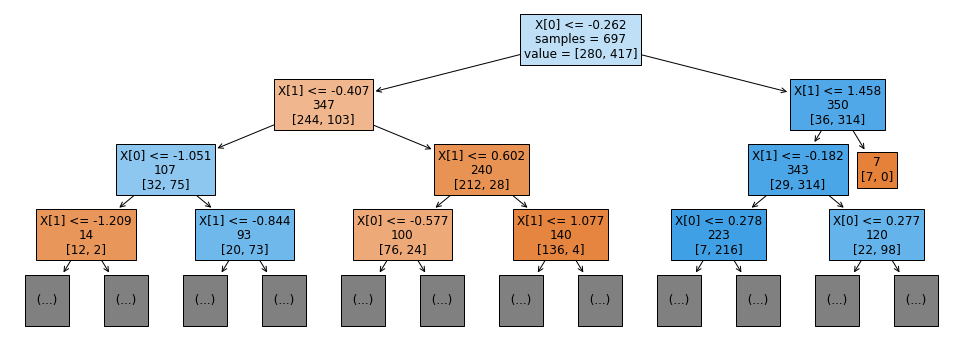

In [391]:
from sklearn.tree import plot_tree
plt.figure(figsize=(17,6))
plot_tree(clf, impurity=False, filled=True, max_depth=3, fontsize=12, label='root')
plt.show()

* Ahora con GridSearchCV

In [416]:
param_arbol = {
          'criterion': ['gini', 'entropy'],
          'max_depth': np.arange(1,9),
          'min_samples_split': np.arange(2,10),
          'min_samples_leaf': np.arange(1,10),
          'max_leaf_nodes': np.arange(1,5),
          'min_impurity_decrease': [0.001,0.05,0.1,0.5,0.8,1]
          }

In [417]:
clf_par = GridSearchCV(clf, param_arbol, cv=5, refit='accuracy', scoring=['accuracy'], n_jobs=-1) 
clf_par.fit(X_train, y_train);

In [418]:
result_arbol=clf_par.cv_results_
rtdos_arbol=pd.DataFrame(result_arbol)
rtdos_arbol.sort_values(by='rank_test_accuracy').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
3081,0.001327,0.000036,0.000467,0.000015,gini,2,4,0.001,8,3,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.878571,0.857143,0.841727,0.834532,0.848921,0.852179,0.015182,1
3047,0.001402,0.000112,0.001761,0.002546,gini,2,4,0.001,3,9,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.878571,0.857143,0.841727,0.834532,0.848921,0.852179,0.015182,1
3048,0.001348,0.000015,0.000462,0.000009,gini,2,4,0.001,4,2,"{'criterion': 'gini', 'max_depth': 2, 'max_lea...",0.878571,0.857143,0.841727,0.834532,0.848921,0.852179,0.015182,1


In [419]:
mejor_arbol=clf_par.best_estimator_

In [420]:
#Nos fijamos en el accuracy logrado sobre el conjunto de train y test respectivamente
([mejor_arbol.score(X_train, y_train),mejor_arbol.score(X_test, y_test)])

[0.8723098995695839, 0.88]

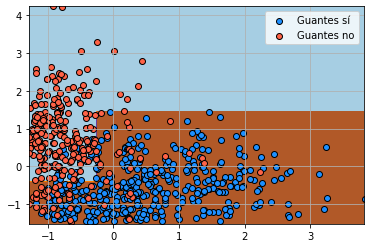

In [421]:
#Graficamos nuestras fronteras de decisiones
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_arbol.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de entrenamiento
plt.scatter( X_train[:,0][y_train==1] , X_train[:,1][y_train==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_train[:,0][y_train==0] , X_train[:,1][y_train==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

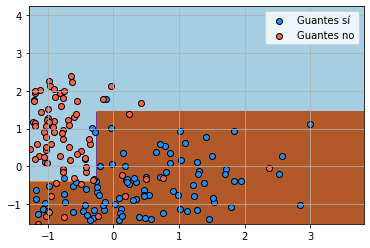

In [422]:
#Graficamos nuestras fronteras de decision
x_start = min(np.min(X_train[:,0]), np.min(X_test[:,0]))
x_end = max(np.max(X_train[:,0]), np.max(X_test[:,0]))
y_start = min(np.min(X_train[:,1]), np.min(X_test[:,1]))
y_end = max(np.max(X_train[:,1]), np.max(X_test[:,1]))

xx, yy= np.meshgrid(np.arange(x_start, x_end, 0.02),
                      np.arange(y_start, y_end,0.02))

Z = mejor_arbol.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

plt.axis("tight")

#Graficamos nuestro conjunto de test
plt.scatter( X_test[:,0][y_test==1] , X_test[:,1][y_test==1], color="dodgerblue", edgecolors='k', label="Guantes sí")
plt.scatter( X_test[:,0][y_test==0] , X_test[:,1][y_test==0], color="tomato", edgecolors='k', label="Guantes no")

plt.grid()
plt.legend()
plt.show()

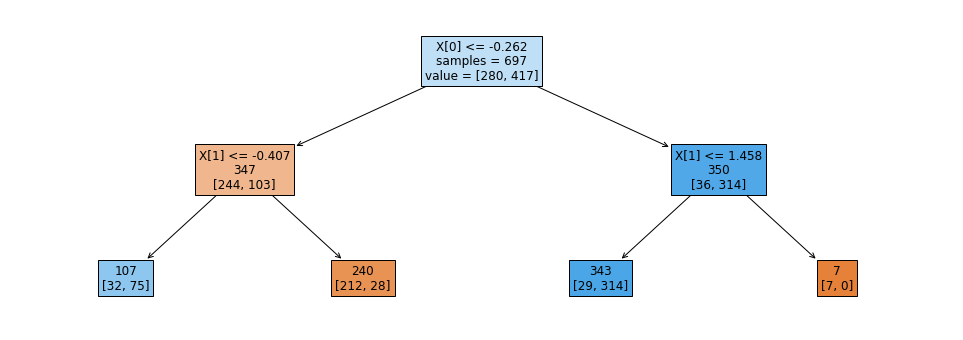

In [423]:
plt.figure(figsize=(17,6))
plot_tree(mejor_arbol, impurity=False, filled=True, fontsize=12, label='root')
plt.show()

In [424]:
mejor_arbol.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': 4,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

Podemos ver que el overfitting disminuyó, así como aumentó el accuracy en el conjunto de datos de test.